# Random Walk and Brownian Motion (1D)

### Random walk is Binomial Distribution
- $n_+$ : total number of steps to the right
- $n_-$ : total number of steps to the left
- $m = n_{+} + n_{-}$ : total number of steps
- $l = n_{+} - n_{-}$ : total current location

Then, 
$$n_{+} = \frac{m+l}{2}$$
$$n_{-} = \frac{m-l}{2}$$

Where the probability of observing $n_+$ or $n_-$ in $m$ trials is distributed as binomial RV with $p = 0.5$:

$$P(l,m)\rightarrow P_{Binomial}(n_{-}; m) = P_{Binomial}(n_+; m) = \frac{m!}{n_+!(m-n_+)!}{p}^{n_+}{(1-p)}^{m-n_+}$$

### Random walk is Normal Distribution
Considering just $n_{+}$ and in the limit where both $n_+$ and $m$ are large, binomial distribution converges to normal distribution with
$\mu_1'=\langle n_+\rangle=mp$ and  $\sigma'^2=\langle n_+^2\rangle - \langle n_+\rangle^2=mp(1-p)$.

By substituting for $n_+$, we arrive to probability distribution function of the location $l$ after $m$ steps $P(l,m)$ with $\mu''_1=\langle l\rangle=m(2p-1)$ and $\sigma''^2=\langle l^2\rangle - \langle l\rangle^2=4mp(1-p)$.

#### Numerical Experiment
We can now verify this with a simulation:

In [1]:
import numpy as np # import numpy library as np
import math # use mathematical functions defined by the C standard
import matplotlib.pyplot as plt # import pyplot library as plt 
plt.style.use('ggplot') # use "ggplot" style for graphs
% matplotlib inline

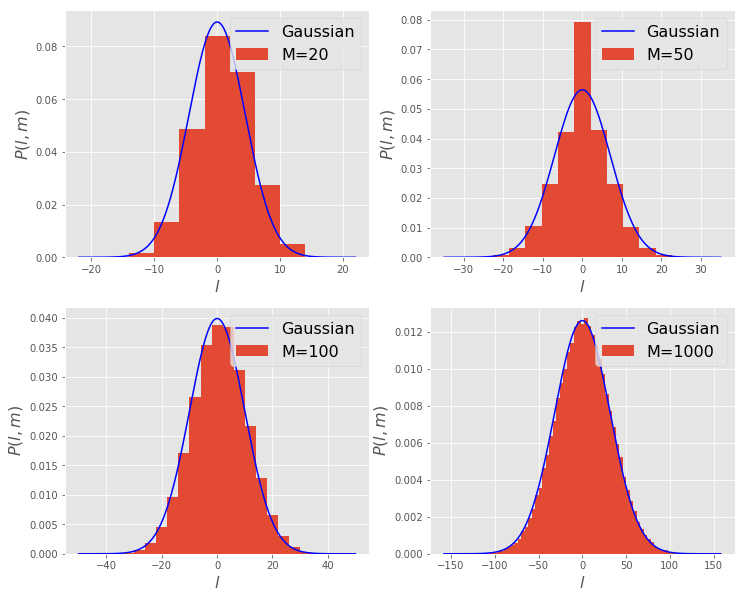

In [2]:
p = 0.5
N = 100000
fig, axes = plt.subplots(2,2, figsize = (12, 10))
Ms = [20, 50, 100, 1000]

for i, ax in enumerate(axes.flatten()):
    ave = Ms[i]*(2*p-1)
    std = np.sqrt(4*Ms[i]*p*(1-p))
    np.random.seed(0)
    nmin=np.int(ave-std*5)
    nmax=np.int(ave+std*5)
    nbin=np.int((nmax-nmin)/4)
    
    L = np.zeros(N)
    for j in range(N):
        steps = np.random.choice([-1, 1], Ms[i]) # steps in both +1 and -1 direction
        L[j] = np.sum(steps) # final location is sum of steps
    
    ax.hist(L,range=[nmin,nmax],bins=nbin,normed=True, label = "M={}".format(Ms[i]))
    x = np.arange(nmin, nmax, 0.01/std)
    y = np.exp(-(x-ave)**2/(2*std**2))/np.sqrt(2*np.pi*std**2)
    ax.plot(x,y,color='b', label = "Gaussian") # plot y vs. x with blue line
    ax.set_xlabel(r'$l$',fontsize=16) # set x-label
    ax.set_ylabel(r'$P(l,m)$',fontsize=16) # set y-label
    ax.legend(fontsize = 16) # set legends

plt.show() # display plots

We observe that the final location $l$ is indeed normally distributed with the mean and variance as above.

## Random Walk is Diffusion

Consider drift-free case with $p=0.5$ and $\langle l \rangle = 0$. If we define $x = al$ as posiiton of the particle/random walker and $t = t_{s}m$ as the time to arrive to this position in $m$ steps, we obtain coresponding pdf $P(x,t) = P(l,m)\frac{1}{a}$, with $\mu_1=\langle x\rangle=0$ and $\sigma^2=\langle x^2\rangle - \langle x\rangle^2=4a^2p(1-p) \frac{t}{t_s}$. Note that the variance is function of time.

Writing general form of diffusion equation and using initial conditions:
$$ \frac{\partial}{\partial t} P(x,t) = D\frac{\partial ^2}{\partial x^2} P(x,t) $$
$$ P(x,t=0) = \delta(x) $$,
we obtain the solution:

$$P(x,t)=\frac{1}{\sqrt{4\pi Dt}} \exp \left[ -\frac{x^2}{4Dt} \right]$$

Now we can identify D in the equation as:
$$D = \frac{2a^2p(1-p)}{t_s} = \frac{\sigma^2}{2t}$$.

Diffusion equation is therfore describing random walk with *mean square displacement* $\sigma^2$.